# Tempo typology

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from diptest import diptest

from helpers import cm2inch, title
matplotlib.style.use('styles.mplstyle')

import warnings
warnings.filterwarnings("ignore", category=Warning)

In [9]:
dfs = dict(
    maidu = pd.read_csv('densmore-metadata/maidu.csv'),
    menominee = pd.read_csv('densmore-metadata/menominee.csv'),
    choctaw = pd.read_csv('densmore-metadata/choctaw.csv'),
    nootka = pd.read_csv('densmore-metadata/nootka.csv'),
    ute = pd.read_csv('densmore-metadata/ute.csv'),
)

In [10]:
# Collect all tempi in all cultures
tempi = []
for culture, df in dfs.items():
    col = 'bpm_voice' if 'bpm_voice' in df.columns else 'bpm'
    single_value = df[col].str.contains("\|") == False
    not_null = df[col].isna() == False
    bpm = df[single_value & not_null][col].astype(int)
    tempi.extend([(culture, t) for t in bpm])

tempi = pd.DataFrame(tempi, columns=['culture', 'bpm'])

<AxesSubplot:xlabel='bpm', ylabel='culture'>

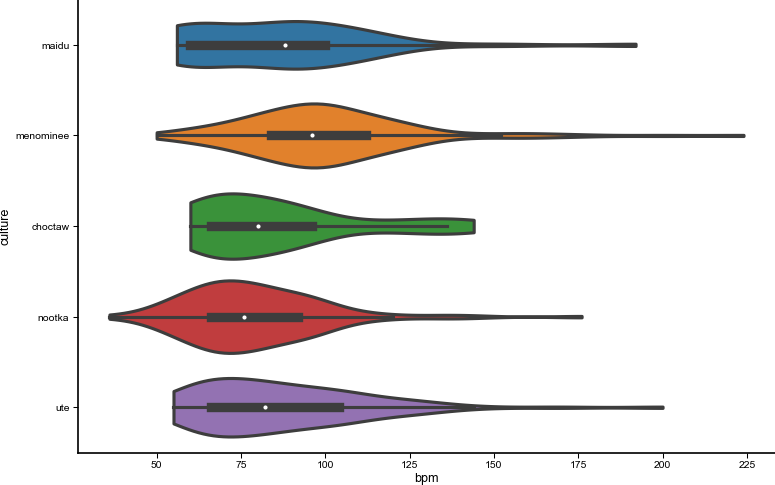

In [11]:
# Quick violinplot of tempo distributions
sns.violinplot(data=tempi, x='bpm', y='culture', cut=0)

In [12]:
maidu_tempi = tempi.query("culture=='maidu'").bpm
nootka_tempi = tempi.query("culture=='nootka'").bpm

In [24]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
disrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mass

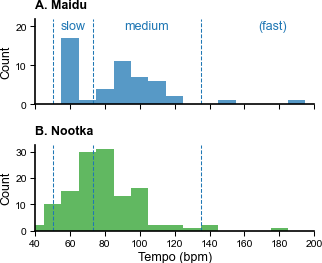

In [34]:
fig, (ax1, ax2) = plt.subplots(2, figsize=cm2inch(6, 5), tight_layout=True, sharex=True)

dist_props = dict(binrange=(35, 255), binwidth=10, lw=0)

def maidu_categories(ax):
    ax.axvline(50, c='C0', ls='--', lw=.5)
    ax.axvline(73, c='C0', ls='--', lw=.5)
    ax.axvline(135, c='C0', ls='--', lw=.5)

title('A. Maidu', ax=ax1)
sns.histplot(maidu_tempi, ax=ax1, **dist_props)
plt.xlim(40, 200)
ax1.set_ylim(0, 22)
ax1.set_xlabel('')
maidu_categories(ax1)
textprops = dict(
    xycoords='axes fraction', 
    xytext=(0, -5), textcoords='offset points',
    color='C0', fontsize=6
)
ax1.annotate('slow', (.09, 1), **textprops)
ax1.annotate('medium', (.32, 1), **textprops)
ax1.annotate('(fast)', (.8, 1), **textprops)

plt.sca(ax2)
title('B. Nootka')
sns.histplot(nootka_tempi, color='C2', ax=ax2, **dist_props)
maidu_categories(ax2)
plt.xlabel('Tempo (bpm)')

plt.savefig('../figures/fig-tempo-typology/tempo-distributions-raw.pdf')

In [35]:
dip, pval = diptest(maidu_tempi)
pval

0.0002466694967327987

In [36]:
dip, pval = diptest(nootka_tempi)
pval

0.07731230705092729

## Old plot

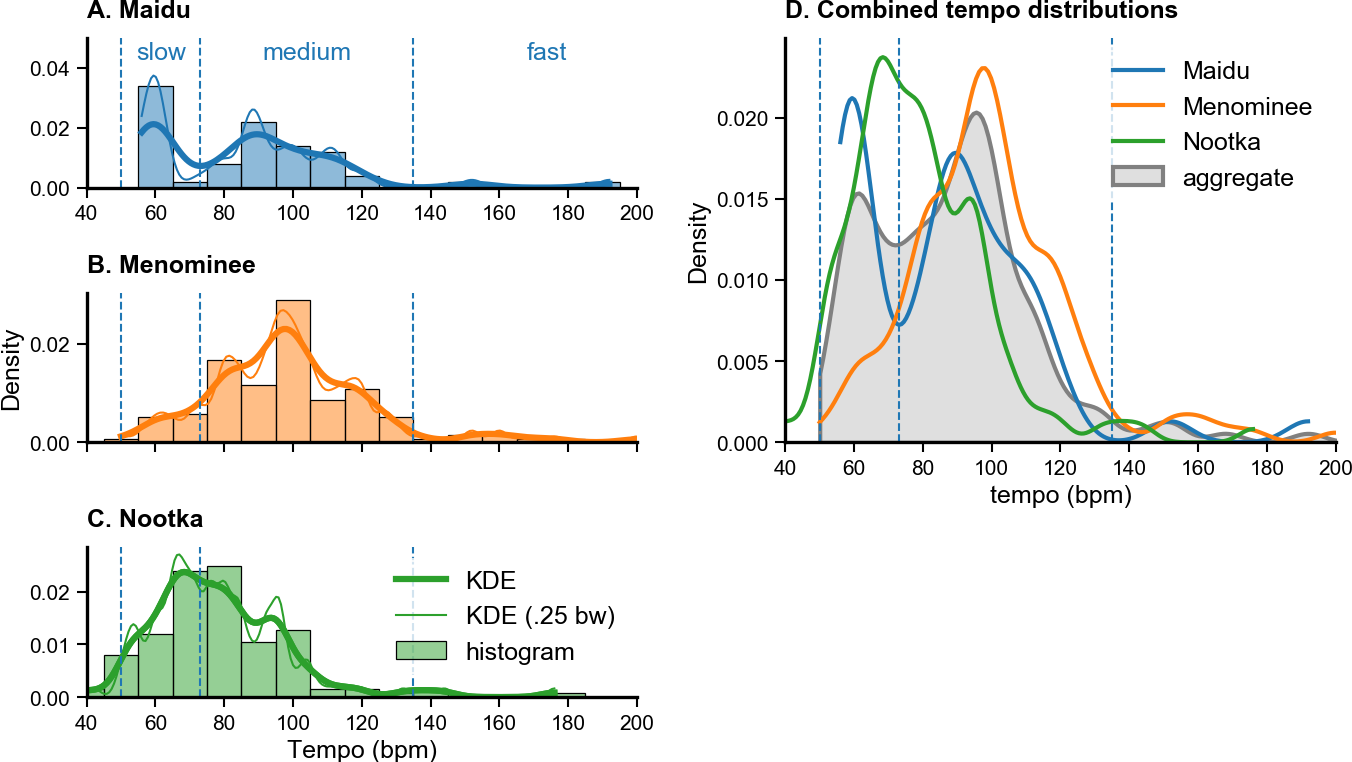

In [240]:
def maidu_categories():
    plt.axvline(50, c='C0', ls='--', lw=.5)
    plt.axvline(73, c='C0', ls='--', lw=.5)
    plt.axvline(135, c='C0', ls='--', lw=.5)
    
fig = plt.figure(figsize=cm2inch(12, 7))
g = plt.GridSpec(3, 2)

props = dict(kde_kws=dict(cut=0, bw_adjust=.5), kde=True, binwidth=10, binrange=(35, 225), lw=.3, stat='density')

ax1 = fig.add_subplot(g[0, 0])
title('A. Maidu')
sns.histplot(tempi['maidu'], **props, label='histogram')
sns.kdeplot(tempi['maidu'], cut=0, color='C0', bw_adjust=.25, lw=.5)
plt.ylim(0, 0.05)
# ax1.set_xticklabels([])
plt.ylabel('')
maidu_categories()
plt.xlim(40, 200)
textprops = dict(xycoords='axes fraction', xytext=(0, -5), textcoords='offset points',
            color='C0', fontsize=6)
plt.annotate('slow', (.09, 1), **textprops)
plt.annotate('medium', (.32, 1), **textprops)
plt.annotate('fast', (.8, 1), **textprops)

ax2 = fig.add_subplot(g[1, 0])
title('B. Menominee')
sns.histplot(tempi['menominee'], **props, color='C1')
sns.kdeplot(tempi['menominee'], cut=0, bw_adjust=.25, lw=.5, color='C1')

ax2.set_xticklabels([])
maidu_categories()
plt.xlim(40, 200)

ax3 = fig.add_subplot(g[2, 0])
title('C. Nootka')
sns.histplot(tempi['nootka'], **props, color='C2', label='histogram')
sns.kdeplot(tempi['nootka'], cut=0, bw_adjust=.5, color='C2', label='KDE')
sns.kdeplot(tempi['nootka'], cut=0, bw_adjust=.25, lw=.5, color='C2', label='KDE (.25 bw)')
plt.xlabel('Tempo (bpm)')
plt.ylabel('')
plt.legend()
maidu_categories()
plt.xlim(40, 200)

ax4 = fig.add_subplot(g[:2, 1])
bw_adjust = .5
sns.kdeplot(combined, cut=0, color='.5', fill=True, label='aggregate', bw_adjust=bw_adjust)
sns.kdeplot(tempi['maidu'], cut=0, label='Maidu', lw=1, ls='-', bw_adjust=bw_adjust)
sns.kdeplot(tempi['menominee'], cut=0, label='Menominee',ls='-', lw=1, bw_adjust=bw_adjust)
sns.kdeplot(tempi['nootka'], cut=0, label='Nootka', lw=1, ls='-',bw_adjust=bw_adjust)
plt.legend()
plt.xlabel('tempo (bpm)')
title('D. Combined tempo distributions')
maidu_categories()

plt.xlim(40, 200)


plt.tight_layout()
plt.savefig('../figures/figZ1-tempo-distributions.pdf')